# 作業3
## 匯入資料集

In [1]:
# 匯入套件pandas
import pandas as pd

# 讀取資料集
rawdata = pd.read_csv('diabetes.csv')

# 打印前五筆
rawdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# 查看欄位的缺值
rawdata.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [3]:
# 提取資料欄位名稱
datanames = rawdata.columns
print(datanames )

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
# 資料轉為陣列
data = rawdata.to_numpy()
print(type(data))
print(data)

<class 'numpy.ndarray'>
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [5]:
# 提取特徵名稱
featurenames = datanames[0:8]
print("特徵名稱" ,featurenames)

# 匯入numpy套件
import numpy as np

# 提取特徵值 (資料移除欄位索引4)
feature = np.delete(data, 8, axis=1) 

# 提取標籤值 (資料提取欄位索引4)
label = data[:,8]

特徵名稱 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


## 01. 資料處理(正規化[0-1])

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(feature)

feature = scaler.transform(feature)
print(feature)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


## 02. 資料分割(訓練集70% 、測試集30%)

In [7]:
# 匯入sklearn中的train_test_split套件
from sklearn.model_selection import train_test_split 

# 資料分割為訓練與測試集
train_x, test_x, train_y, test_y = train_test_split(feature, label, random_state = 0, test_size = 0.3)

# 匯入collections中的Counter
from collections import Counter

# 計算總資料的類別數量
print("總資料的類別數量：", Counter(label))

# 打印訓練集與測試集數量與其類別
print("訓練集數量", len(train_x))
print("訓練集的類別數量：", Counter(train_y))

print("測試集數量", len(test_x))
print("測試集的類別數量：", Counter(test_y))

總資料的類別數量： Counter({0.0: 500, 1.0: 268})
訓練集數量 537
訓練集的類別數量： Counter({0.0: 343, 1.0: 194})
測試集數量 231
測試集的類別數量： Counter({0.0: 157, 1.0: 74})


## 03. 資料視覺化 

In [8]:
# 建立標籤名稱列表
label_name = ['Normal', 'Diabetes']

# 將移除標籤的資料，其內容與標籤再進行合併
df = pd.DataFrame(feature, columns=featurenames)

# DataFrame中建立標籤名稱一欄
df['label'] = [label_name[i] for i in label.astype(int)]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,Diabetes
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,Normal
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,Diabetes
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,Normal
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,Diabetes
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,Normal
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,Normal
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,Normal
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,Diabetes


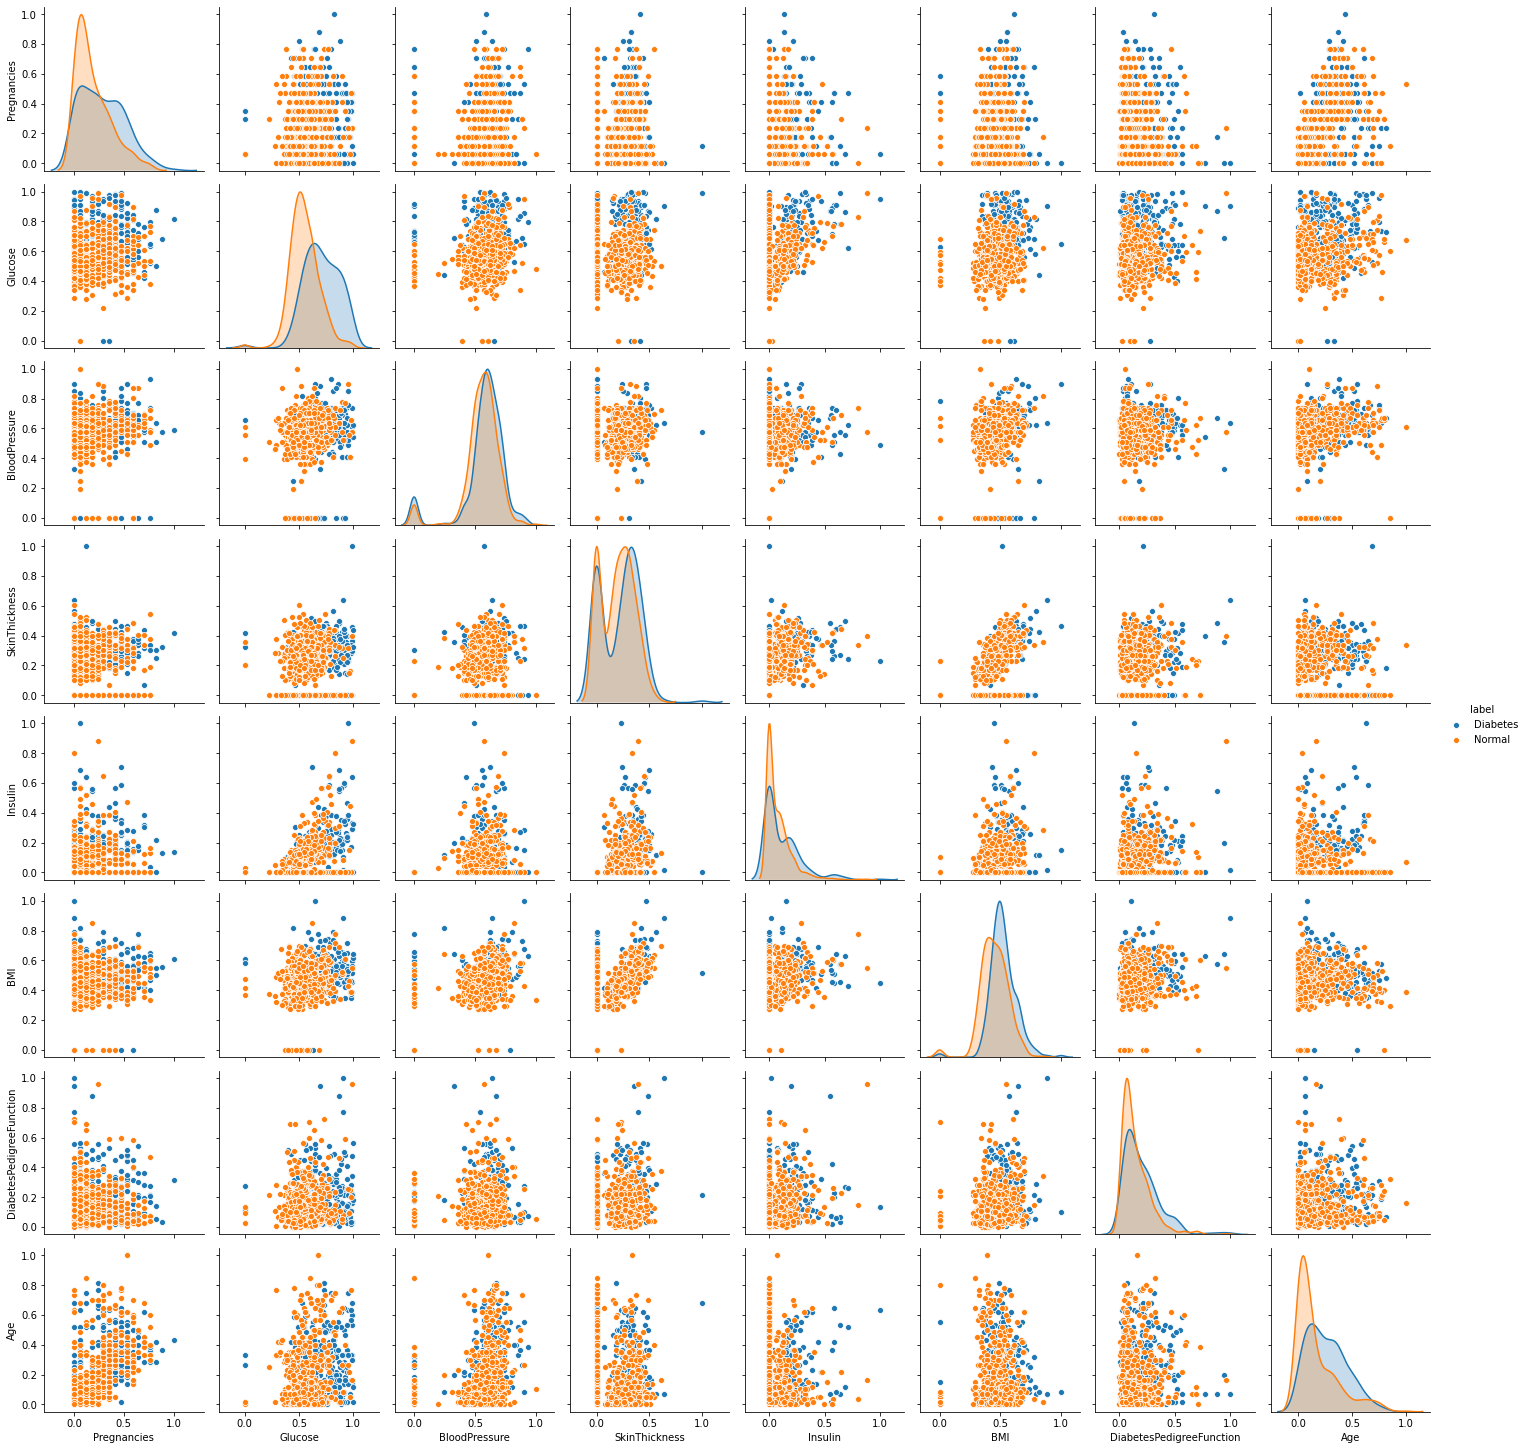

In [9]:
import seaborn as sns

# 繪製兩變數間的資料視覺化圖
sns.pairplot(df, hue='label')

## 04. 模型訓練

In [10]:
# 匯入sklearn中的LogisticRegression(邏輯回歸)套件
from sklearn.linear_model import LogisticRegression

# 定義邏輯回歸超參數，迭代次數1000
LR_Model = LogisticRegression(random_state=0, max_iter=1000)

# 開始訓練邏輯回歸，給予訓練集的輸入特徵與標籤(答案)
LR_Model.fit(train_x, train_y)

# 訓練集批量預測
LR_train_predict = LR_Model.predict(train_x)
LR_train_predict_proba = LR_Model.predict_proba(train_x)

# 測試集批量預測
LR_test_predict = LR_Model.predict(test_x)
LR_test_predict_proba = LR_Model.predict_proba(test_x)

In [11]:
# 打印權重係數
print(LR_Model.coef_)

[[ 1.06900949  4.32445033 -0.47466305  0.5106191  -0.04947283  2.96903807
   1.16869208  1.32013794]]


## 05. 模型可解釋性(視覺化)

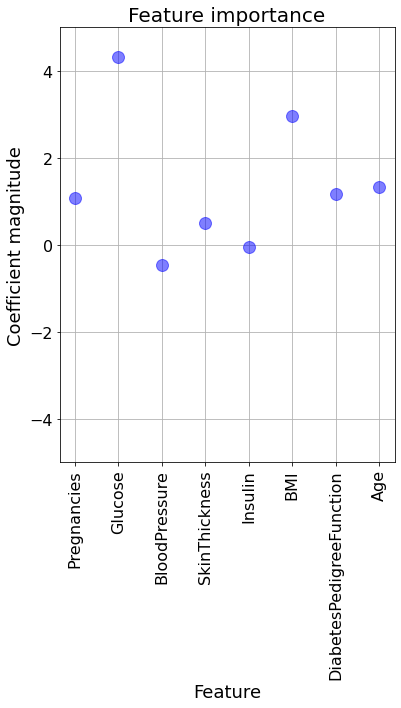

In [12]:
# 匯入matplotlib中的plt繪圖套件
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8))                                                    # 圖片大小
plt.title('Feature importance',size = 20)                                     # 圖片標題
plt.plot(LR_Model.coef_[0].T,'o',markersize=12, color = 'blue', alpha = 0.5)  # 繪製資料(圖示用圓形，大小為12，顏色藍色，透明度0.5)
plt.xticks(range(len(featurenames)), featurenames , rotation=90, size = 16)   # x軸：給予特徵名稱(旋轉90度，大小為16)
plt.yticks(rotation=0, size = 16)                                             # y軸(旋轉0度，大小為16)
plt.ylim(-5, 5)                                                               # y軸刻度範圍
plt.grid()                                                                    # 繪製網格
plt.xlabel("Feature",size = 18)                                               # x軸標題名稱(大小為18)
plt.ylabel("Coefficient magnitude",size = 18)                                 # y軸標題名稱(大小為18)
plt.show()                                                                    # 顯示圖片

## 驗證指標

In [13]:
def sensitivity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp+fn)
    return sensitivity

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity

In [14]:
# 匯入sklearn中的混淆矩陣與準確度套件
from sklearn.metrics import confusion_matrix, accuracy_score

# 計算混淆矩陣(給予訓練集的標籤、模型預測)
cm = confusion_matrix(train_y, LR_train_predict)
print("訓練集的混淆矩陣：\n", cm)

# 計算準確度(給予訓練集的標籤、模型預測)
acc = accuracy_score(train_y, LR_train_predict)
print("訓練集的準確度：%0.3f" %(acc))

# 計算敏感度(給予訓練集的標籤、模型預測)
sen = sensitivity_score(train_y, LR_train_predict)
print("測試集的敏感度：%0.3f" %(sen))

# 計算敏感度(給予訓練集的標籤、模型預測)
spe = specificity_score(train_y, LR_train_predict)
print("測試集的特異度：%0.3f" %(spe))

訓練集的混淆矩陣：
 [[306  37]
 [ 93 101]]
訓練集的準確度：0.758
測試集的敏感度：0.521
測試集的特異度：0.892


In [15]:
# 計算混淆矩陣(給予測試集的標籤、模型預測)
cm = confusion_matrix(test_y, LR_test_predict)
print("測試集的混淆矩陣：\n", cm)

# 計算準確度(給予測試集的標籤、模型預測)
acc = accuracy_score(test_y, LR_test_predict)
print("測試集的準確度：%0.3f" %(acc))

# 計算敏感度(給予測試集的標籤、模型預測)
sen = sensitivity_score(test_y, LR_test_predict)
print("測試集的敏感度：%0.3f" %(sen))

# 計算敏感度(給予測試集的標籤、模型預測)
spe = specificity_score(test_y, LR_test_predict)
print("測試集的特異度：%0.3f" %(spe))

測試集的混淆矩陣：
 [[143  14]
 [ 40  34]]
測試集的準確度：0.766
測試集的敏感度：0.459
測試集的特異度：0.911


Text(0, 0.5, 'Number')

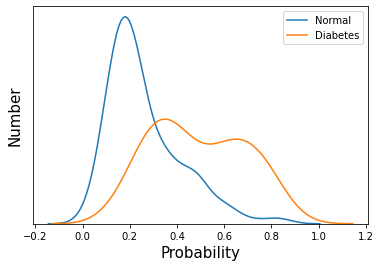

In [16]:
LR_test_predict_proba_0 = []
LR_test_predict_proba_1 = []

for i in range(len(test_y)):
    if test_y[i].astype(int) == 0:
        LR_test_predict_proba_0.append(LR_test_predict_proba[:,1][i])
    else:
        LR_test_predict_proba_1.append(LR_test_predict_proba[:,1][i])

fig = sns.kdeplot(LR_test_predict_proba_0, label="Normal")
fig = sns.kdeplot(LR_test_predict_proba_1, label="Diabetes") 
fig.set(yticklabels=[]) 
fig.tick_params(left=False)  
fig.set_xlabel("Probability", fontsize = 15)
fig.set_ylabel("Number", fontsize = 15)

In [17]:
LR_test_predict_th = []

for i in range(len(LR_test_predict_proba[:,1])):
    if LR_test_predict_proba[:,1][i] > 0.32:
        LR_test_predict_th.append(1)
    else:
        LR_test_predict_th.append(0)
        
# 計算混淆矩陣(給予測試集的標籤、模型預測)
cm = confusion_matrix(test_y, LR_test_predict_th)
print("測試集的混淆矩陣：\n", cm)

# 計算準確度(給予測試集的標籤、模型預測)
acc = accuracy_score(test_y, LR_test_predict_th)
print("測試集的準確度：%0.3f" %(acc))

# 計算敏感度(給予測試集的標籤、模型預測)
sen = sensitivity_score(test_y, LR_test_predict_th)
print("測試集的敏感度：%0.3f" %(sen))

# 計算敏感度(給予測試集的標籤、模型預測)
spe = specificity_score(test_y, LR_test_predict_th)
print("測試集的特異度：%0.3f" %(spe))

測試集的混淆矩陣：
 [[112  45]
 [ 18  56]]
測試集的準確度：0.727
測試集的敏感度：0.757
測試集的特異度：0.713


## 06. 儲存與讀取模型

In [18]:
# 匯入joblib
import joblib

# 儲存模型
joblib.dump(LR_Model, 'LR.pkl') 

# 讀取模型
LR_Model = joblib.load('LR.pkl')

## 單筆資料預測

In [19]:
# 使用input輸入資料存入變數，並且轉換為浮點數型別
data_1 = float(input("輸入你的 懷孕次數(Pregnancies)："))        
data_2 = float(input("輸入你的 葡萄糖(Glucose)：")) 
data_3 = float(input("輸入你的 血壓(BloodPressure)：")) 
data_4 = float(input("輸入你的 皮膚厚度(SkinThickness)：")) 
data_5 = float(input("輸入你的 胰島素(Insulin))：")) 
data_6 = float(input("輸入你的 身體質量指標(BMI)：")) 
data_7 = float(input("輸入你的 糖尿病家族史(Diabetes Pedigree Function)：")) 
data_8 = float(input("輸入你的 年齡(Age):")) 

# 資料轉為陣列
input_data = np.array([data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8])

# 正規化
input_data = scaler.transform([input_data])

# 代入模型預測
predict = LR_Model.predict(input_data)
predict_proba = LR_Model.predict_proba(input_data)
print("AI的邏輯回歸預測為：", predict)
print("預測機率為：", predict_proba)

輸入你的 懷孕次數(Pregnancies)：6
輸入你的 葡萄糖(Glucose)：148
輸入你的 血壓(BloodPressure)：72
輸入你的 皮膚厚度(SkinThickness)：35
輸入你的 胰島素(Insulin))：0
輸入你的 身體質量指標(BMI)：33.6
輸入你的 糖尿病家族史(Diabetes Pedigree Function)：0.627
輸入你的 年齡(Age):50
AI的邏輯回歸預測為： [1.]
預測機率為： [[0.35841779 0.64158221]]


---

## 討論
* **[問題]** 模型中最高得重要性的特徵是否與，我們認知的糖尿病了解呈相關？ (比如醫學認知空腹血糖高、肥胖是糖尿病重要因子，模型是呈現同樣結果?)

* **[回答]** 模型特徵權重值最高為Glucose(空腹血液葡萄糖)簡稱為血糖，其二為身體質量指數，而醫學上評斷糖尿病的指標為空腹血糖與肥胖，因此完全反映其結果。

## 問題
* 資料的類別數量不均勻導致模型偏向學習類別數量多的Class 0，造成特異度過高，敏感度過低。解決方式：
    * 1. 可以調整機率臨界值，目前是以0.5為臨界值，若Class 1> Class 0的機率時(Class 1的機率>0.5)，則預測為Class 1；反之，則預測為Class 0。
    * 2. 資料的類別數量調整均勻
    * 3. 調整模型中針對類別數量不均勻的超參數
* 資料中有異常值，許多不合邏輯的為0數值，如BMI等等。解決方式：資料前處理移除異常值。


## Pima Indians diabetes mellitus classification based on machine learning (ML) algorithms
* 仿照這篇論文[[連結]](https://link.springer.com/content/pdf/10.1007/s00521-022-07049-z.pdf)進行不同的分類器訓練，並比較其結果

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# 定義決策樹、隨機森林、貝葉斯分類器的模型超參數
DT_Model = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=5)
RF_Model = RandomForestClassifier(random_state=0, n_estimators=100)
NB_Model = GaussianNB()  
                      
# 開始訓練模型，給予訓練集的輸入特徵與標籤(答案)
DT_Model.fit(train_x, train_y)
RF_Model.fit(train_x, train_y)
NB_Model.fit(train_x, train_y)

# 測試集批量預測，計算混淆矩陣、準確度
# 決策樹
DT_test_predict = DT_Model.predict(test_x)
DT_test_predict_proba = DT_Model.predict_proba(test_x)
cm = confusion_matrix(test_y, DT_test_predict)
print("決策樹的混淆矩陣：\n", cm)
acc = accuracy_score(test_y, DT_test_predict)
print("決策樹的準確度：%0.3f" %(acc))
sen = sensitivity_score(test_y, DT_test_predict)
print("決策樹的敏感度：%0.3f" %(sen))
spe = specificity_score(test_y, DT_test_predict)
print("決策樹的特異度：%0.3f" %(spe), "\n")

# 隨機森林
RF_test_predict = RF_Model.predict(test_x)
RF_test_predict_proba = RF_Model.predict_proba(test_x)
cm = confusion_matrix(test_y, RF_test_predict)
print("隨機森林的混淆矩陣：\n", cm)
acc = accuracy_score(test_y, RF_test_predict)
print("隨機森林的準確度：%0.3f" %(acc))
sen = sensitivity_score(test_y, RF_test_predict)
print("隨機森林的敏感度：%0.3f" %(sen))
spe = specificity_score(test_y, RF_test_predict)
print("隨機森林的特異度：%0.3f" %(spe), "\n")

# 貝葉斯分類器
NB_test_predict = NB_Model.predict(test_x)
NB_test_predict_proba = NB_Model.predict_proba(test_x)
cm = confusion_matrix(test_y, NB_test_predict)
print("貝葉斯分類器的混淆矩陣：\n", cm)
acc = accuracy_score(test_y, NB_test_predict)
print("貝葉斯分類器的準確度：%0.3f" %(acc))
sen = sensitivity_score(test_y, NB_test_predict)
print("貝葉斯分類器的敏感度：%0.3f" %(sen))
spe = specificity_score(test_y, NB_test_predict)
print("貝葉斯分類器的特異度：%0.3f" %(spe), "\n")

決策樹的混淆矩陣：
 [[132  25]
 [ 30  44]]
決策樹的準確度：0.762
決策樹的敏感度：0.595
決策樹的特異度：0.841 

隨機森林的混淆矩陣：
 [[140  17]
 [ 34  40]]
隨機森林的準確度：0.779
隨機森林的敏感度：0.541
隨機森林的特異度：0.892 

貝葉斯分類器的混淆矩陣：
 [[138  19]
 [ 36  38]]
貝葉斯分類器的準確度：0.762
貝葉斯分類器的敏感度：0.514
貝葉斯分類器的特異度：0.879 



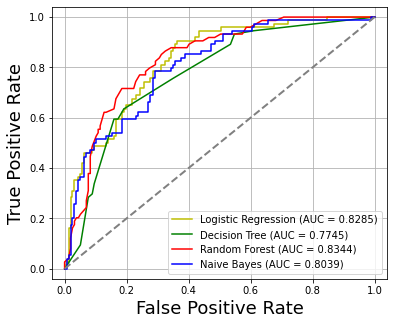

In [21]:
from sklearn.metrics import roc_curve, auc

# Receiver Operating Characteristic Curve
plt.figure(figsize=(6,5))

# 決策樹
fpr, tpr, thresholds = roc_curve(y_true= test_y, y_score= LR_test_predict_proba[:,1]) 
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr,tpr,color='y',label='%s (AUC = %0.4f)' % ('Logistic Regression', roc_auc))

# 決策樹
fpr, tpr, thresholds = roc_curve(y_true= test_y, y_score= DT_test_predict_proba[:,1]) 
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr,tpr,color='g',label='%s (AUC = %0.4f)' % ('Decision Tree', roc_auc))

# 隨機森林
fpr, tpr, thresholds = roc_curve(y_true= test_y, y_score= RF_test_predict_proba[:,1]) 
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr,tpr,color='r',label='%s (AUC = %0.4f)' % ('Random Forest', roc_auc))

# 貝葉斯分類器
fpr, tpr, thresholds = roc_curve(y_true= test_y, y_score= NB_test_predict_proba[:,1]) 
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr,tpr,color='b',label='%s (AUC = %0.4f)' % ('Naive Bayes', roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1],[0, 1],linestyle='--',color='gray', linewidth=2)
plt.xlim([-0.04, 1.04])
plt.ylim([-0.04, 1.04])
plt.grid()
plt.xlabel('False Positive Rate', size = 18)
plt.ylabel('True Positive Rate', size = 18)
plt.show()

| 模型(Model) | 準確度(Accuracy, Acc) | 敏感度(Sensitivity, Sen) | 特異度(Specificity, Spe) | ROC AUC |
| :----: | :----: | :----: | :----: | :----: | 
| 邏輯回歸(Logistic Regression) | 76.6% | 45.9% | 91.1% | 82.85% | 
| 決策樹(Decision Tree) | 76.2% | 59.5% | 84.1% | 77.45% | 
| 隨機森林(Random Forest) | 77.9% | 54.1% | 89.2% | 83.44% | 
| 貝葉斯分類器(Naive Bayes) | 76.2% | 51.4% | 87.9% | 80.39% | 